In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

print("setup complete")

setup complete


In [372]:
df=pd.read_csv("insurance_data.csv")
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


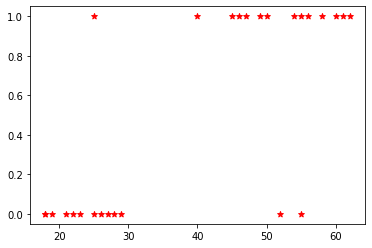

In [373]:
plt.scatter(df.age, df.bought_insurance, marker='*', color='red')

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
xtrain,xtest, ytrain,ytest= train_test_split(df[['age']], df.bought_insurance, test_size=0.3)




In [376]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain, ytrain)
model.predict(xtest)

array([1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [377]:
model.score(xtest,ytest)

0.8888888888888888

In [378]:
model.predict_proba(xtest)

array([[0.41348226, 0.58651774],
       [0.88147269, 0.11852731],
       [0.79639194, 0.20360806],
       [0.54633544, 0.45366456],
       [0.21191471, 0.78808529],
       [0.11273826, 0.88726174],
       [0.90208738, 0.09791262],
       [0.29213204, 0.70786796],
       [0.12390293, 0.87609707]])

**Logistic Regression from scratch**

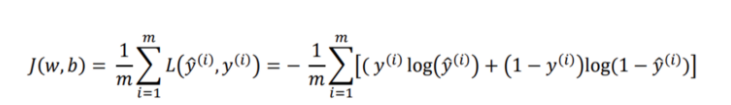

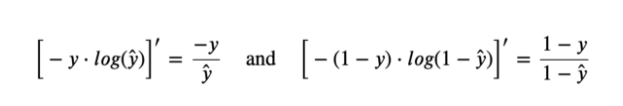

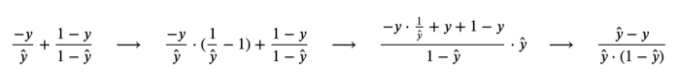

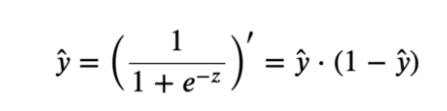

In [435]:
from numpy.random import rand

class LR:
    
    def accurate(self, ytrue,xtest):
        ycheck=ytrue.values.reshape(-1)
        scores=np.sum(ycheck==self.predict(xtest))/len(ytrue)
        return scores
    
    
    def sigmoid(self, z): return 1.0 / (1 + np.exp(-z))
    
    def loss(self, y, y_hat): 
        loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss
    
    def gradients(self, X, y, y_hat):
        m = X.shape[0]
        dw = (1/m)*np.dot(X.T, (y_hat - y))
        db = (1/m)*np.sum((y_hat - y)) 
        return dw, db
    
    def fit(self, X, y, bs, epochs, lr):    
        m,n=X.shape
        loss = []
        weights = np.zeros((n,1))
        y = y.values.reshape(m,1)
        bias =  0
        N = len(X)
        for _ in range(epochs):   
            for i in range ((m-1)//bs+1):
                start_i = i*bs
                end_i = start_i + bs
                xb = X[start_i:end_i]
                yb = y[start_i:end_i]
                y_hat = self.sigmoid(np.dot(xb, weights)+bias)
                dw, db=self.gradients(xb, yb, y_hat)
                weights -= lr * dw
                bias -= lr *db
            l=self.loss(y, self.sigmoid(np.dot(X, weights) + bias))
            loss.append(l)    
        self.weights = weights
        self.loss = loss
        return weights, loss
    def predict(self, X):        
        z = np.dot(X, self.weights)
        val=self.sigmoid(z+b)
        return [1 if i > 0.5 else 0 for i in val]
        

In [436]:
df=pd.read_csv("insurance_data.csv")
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [437]:
xtrain,xtest, ytrain,ytest= train_test_split(df[['age']], df.bought_insurance, test_size=0.3)

In [444]:
model2=LR()
w,l=model2.fit(xtrain, ytrain, bs=100, epochs=1000, lr=0.002)
res=model2.predict(xtest)
print("show me y predict {}\n".format(res))
yt=ytest.values.reshape(-1)
print("true value is {}".format(yt))



show me y predict [0, 0, 0, 0, 0, 1, 1, 1, 1]

true value is [0 0 0 0 0 1 1 1 0]


In [445]:
sc=model2.accurate(ytest,xtest)
print(sc)

0.8888888888888888
